#Gradient Descent

In the following section will I perform a process of updating weights for two examples using Stochastic Gradient Descent

## First example

In the first example I will use the Swedish Committee on Analysis of Risk Premium in Motor Insurance

In the dataset:

- \( X \) = number of claims
- \( Y \) = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

In [1]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook

In [2]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [3]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

Firstly we normalise the data presented in data.head() so that one of the variables will not be more dominant in the analysis

In [5]:
data_s.head()

,X,Y
0,0.870968,0.929654
1,0.153226,0.109427
2,0.104839,0.037186
3,1.000000,1.000000
4,0.322581,0.282804


The first show the input variable

In [6]:
data_s['X'][0]

0.8709677419354839

Then compute the true value

In [7]:
data_s['Y'][0]

0.929654192325912

Afterwords we calculate the prediction value

This is calculated by taking the true value and multiply it by the weight

y = wx

In [8]:
data_s['X'][0]*10

8.709677419354838

Then we calculate the gradient calculation

This is calculated by taking the average of 2 multiplied by the input variable multiplied by the prediction value minus the true value

np.mean(2*x*(y-t)

In [9]:
np.mean(2*data_s['X'][0]*(8.709677419354838-0.929654192325912))

13.552298524502001

We know update the weights

We set the learning rate to 2

The updating of the weights are done by multipling the learning_rate and the gradient and then substracting the sum of the calculation with the original weight, which in this insident is 10

In [10]:
learning_rate = 2

In [11]:
10 - learning_rate*13.552298524502001

-17.104597049004003

We will now calculate the loss function

This is done by taking the average of a function where the squared is taken by the true value minus the prediction value

np.mean((t-y)**2)

In [12]:
np.mean((data_s['Y'][0]-data_s['X'][0]*10)**2)

60.528761413109585

##Second example

In the second example will I use the same dataset but instead do the calculation for the newt step

The calculations will be done for sample 2 of the dataset

Firstly I determine the input variable for the new step

In [13]:
data_s['X'][1]

0.1532258064516129

Then compute the true value

In [14]:
data_s['Y'][1]

0.1094268119374704

Afterwords we calculate the prediction value


When calculating the next step we use the updated weight from the previous step

y = wx

In [15]:
data_s['X'][1]*-17.104597049004003

-2.6208656768635166

Then we calculate the gradient calculation


np.mean(2x(y-t)

In [16]:
np.mean(2*data_s['X'][1]*(-2.6208656768635166-0.1094268119374704))

-0.8367025368906251

We know update the weights

We update the weights by using the updated weights from the last step and minus the sum of the learning rate multiplyed by the new gradient weight

In [17]:
-17.104597049004003 - learning_rate*-0.8367025368906251

-15.431191975222752

We will now calculate the new loss function

In [18]:
np.mean((data_s['Y'][1]-data_s['X'][1]*-17.104597049004003)**2)

7.454497074403089

#Attention Mechanisme

In the following section the attention mechanisme exercise will be performed

##The bank of the river

We will calculate the embeddings for "The bank of the river" using BERT

In [19]:
!pip install transformers --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.5 MB/s eta 0:00:00


In [20]:
import numpy as np
import torch

In [47]:
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the sentence
sentence = "The bank of the river."
inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=True)

# Get the token IDs (input to the model)
input_ids = inputs['input_ids']

# Forward pass through BERT to get the embeddings
with torch.no_grad():
    outputs = model(input_ids)

# The last_hidden_state is the embeddings for the last layer
# It has shape [batch_size, sequence_length, hidden_size], where hidden_size is 768 for BERT base
embeddings = outputs.last_hidden_state.squeeze(0)  # Remove the batch dimension

# Now, `embeddings` contains the embeddings for each token in the sentence

In [48]:
embeddings.shape

torch.Size([8, 768])

We go in and filter so that we are looking specificly for the 5 words in the above sentence

In [49]:
embeddings = embeddings[1:6]

In [50]:
embeddings

tensor([[-0.5750, -0.5788, -0.5748,  ..., -0.0392,  0.4852, -0.0132],
        [-0.7964, -0.0945, -0.0785,  ..., -0.4288, -0.3915, -0.0054],
        [-0.5301, -0.2400, -0.2633,  ..., -0.4168, -0.4402,  0.4956],
        [-0.1171, -0.5150, -0.1592,  ..., -0.1978,  0.0113, -0.3614],
        [ 0.4585, -0.1626,  0.1467,  ...,  0.1964, -0.4308, -0.5602]])

In [51]:
embeddings.shape

torch.Size([5, 768])

We now want to perform the steps in the attention mechanism. The steps in the attention mechanism are the following:
- Step 1: Similarity - Calculate dot products for Q and K (attention scores)
- Step 2: Weights - Apply softmax to attention scores
- Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors



Before we insert the embeddings we have calculated using the BERT, we have to keep in mind that the results has to be put into arrays which is done by the "np.array"

In [60]:
sentence_1 = ["the", "bank", "of", "the", "river"]
# Initialize matrices for Q, K, V

Q_1 = np.array(embeddings)
K_1 = np.array(embeddings)
V_1 = np.array(embeddings)

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)

In [53]:
attention_scores_1

array([[206.20651 ,  83.04788 , 128.35246 , 153.8284  ,  93.3191  ],
       [ 83.04788 , 190.10727 , 109.263535, 102.65686 , 127.55391 ],
       [128.35246 , 109.263535, 199.40714 , 169.7085  , 134.47267 ],
       [153.8284  , 102.65686 , 169.7085  , 229.48361 , 161.04176 ],
       [ 93.3191  , 127.55391 , 134.47267 , 161.04176 , 228.80652 ]],
      dtype=float32)

In [54]:
attention_weights_1

array([[1.0000000e+00, 0.0000000e+00, 1.5431773e-34, 1.7884411e-23,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 7.7626880e-36, 1.0489867e-38,
        6.8142950e-28],
       [1.3846752e-31, 7.0979270e-40, 1.0000000e+00, 1.2648674e-13,
        6.2997138e-29],
       [1.3911012e-33, 0.0000000e+00, 1.0964705e-26, 1.0000000e+00,
        1.8883512e-30],
       [0.0000000e+00, 1.1210388e-44, 1.0747959e-41, 3.7165565e-30,
        1.0000000e+00]], dtype=float32)

In [55]:
attention_output_1

array([[-0.57501024, -0.5788028 , -0.57484514, ..., -0.03924207,
         0.48523563, -0.01316001],
       [-0.7963598 , -0.09446155, -0.07845817, ..., -0.42880008,
        -0.3915095 , -0.00539121],
       [-0.53007376, -0.2400222 , -0.2633207 , ..., -0.41683054,
        -0.4401723 ,  0.49564207],
       [-0.1171483 , -0.5149877 , -0.15923049, ..., -0.19775128,
         0.01125966, -0.36135077],
       [ 0.45851472, -0.1625916 ,  0.14670944, ...,  0.19640635,
        -0.43081006, -0.56021047]], dtype=float32)

To illustrate how the words are placed in a vector space we reduce the dimensions of the embeddings to 2, so that it is possible to display them in a 2D space

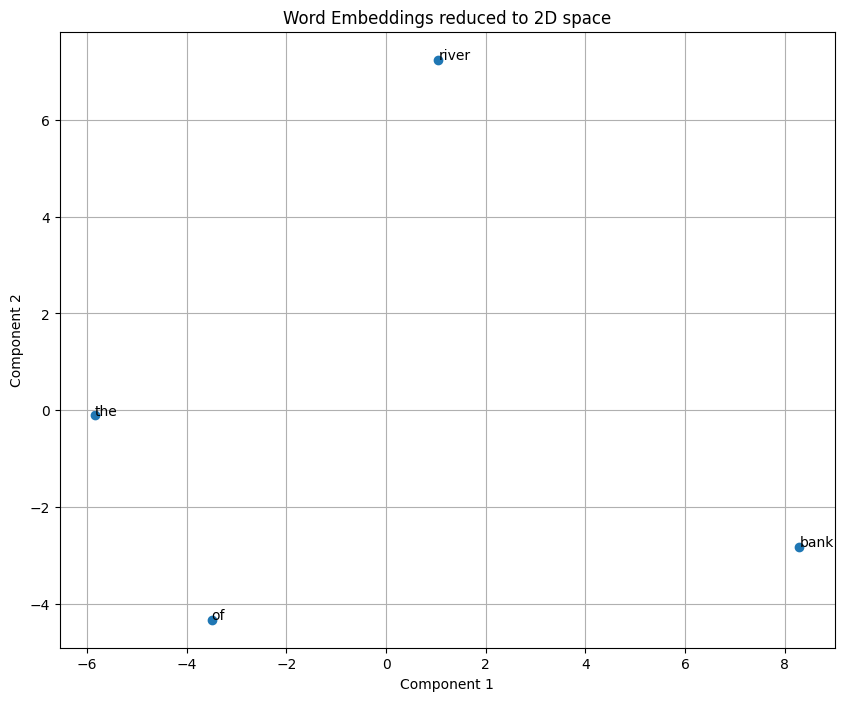

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a PCA object to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the embeddings using PCA
reduced_embeddings = pca.fit_transform(embeddings[1:])

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate the points with the words
words = ["bank", "of", "the", "river"]

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('Word Embeddings reduced to 2D space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

##Money in the bank

We will now perform the same calculations using the phase "Money in the bank"

In [70]:
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer_2 = BertTokenizer.from_pretrained('bert-base-uncased')
model_2 = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the sentence
sentence_2 = "Money in the bank"
inputs_2 = tokenizer(sentence_2, return_tensors="pt", add_special_tokens=True)

# Get the token IDs (input to the model)
input_ids_2 = inputs_2['input_ids']

# Forward pass through BERT to get the embeddings
with torch.no_grad():
    outputs_2 = model(input_ids_2)

# The last_hidden_state is the embeddings for the last layer
# It has shape [batch_size, sequence_length, hidden_size], where hidden_size is 768 for BERT base
embeddings_2 = outputs_2.last_hidden_state.squeeze(0)  # Remove the batch dimension

# Now, `embeddings` contains the embeddings for each token in the sentence

In [71]:
embeddings_2.shape

torch.Size([6, 768])

We go in and filter so that we are looking specificly for the 4 words in the above sentence

In [75]:
embeddings_2 = embeddings_2[1:5]

In [76]:
embeddings_2

tensor([[-1.2124, -0.7215, -0.5642,  ..., -0.2531, -0.2335,  0.2688],
        [-0.5468, -0.4709, -0.5990,  ..., -0.2600,  0.6713, -0.4869],
        [-0.4017, -0.5309, -0.9628,  ..., -0.2013, -0.1055, -0.3972],
        [ 0.8097,  0.1653, -0.3084,  ..., -0.1698, -0.7407, -0.2296]])

In [77]:
embeddings_2.shape

torch.Size([4, 768])

We now want to perform the steps in the attention mechanism. The steps in the attention mechanism are the following:
- Step 1: Similarity - Calculate dot products for Q and K (attention scores)
- Step 2: Weights - Apply softmax to attention scores
- Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors


Before we insert the embeddings we have calculated using the BERT, we have to keep in mind that the results has to be put into arrays which is done by the "np.array"

In [78]:
sentence_2 = ["Money", "in", "the", "bank"]
# Initialize matrices for Q, K, V

Q_2 = np.array(embeddings_2)
K_2 = np.array(embeddings_2)
V_2 = np.array(embeddings_2)

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_2 = Q_2.dot(K_2.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_2 = np.apply_along_axis(softmax, 1, attention_scores_2)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_2 = attention_weights_2.dot(V_2)

In [79]:
attention_scores_2

array([[218.868   , 142.86656 ,  87.24394 ,   8.845545],
       [142.86656 , 249.15959 ,  92.76553 ,  27.437151],
       [ 87.24394 ,  92.76553 , 234.41742 ,  22.585785],
       [  8.845545,  27.437151,  22.585785, 227.71655 ]], dtype=float32)

In [81]:
attention_weights_2

array([[1.000000e+00, 9.840031e-34, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]],
      dtype=float32)

In [82]:
attention_output_2

array([[-1.212428  , -0.7215117 , -0.5641559 , ..., -0.25309756,
        -0.2334621 ,  0.26876387],
       [-0.5468209 , -0.47094288, -0.5989534 , ..., -0.260013  ,
         0.67126423, -0.48693076],
       [-0.40171042, -0.5308609 , -0.9627955 , ..., -0.20131975,
        -0.10550499, -0.39718258],
       [ 0.80974627,  0.16528583, -0.308397  , ..., -0.16976532,
        -0.74065936, -0.22956035]], dtype=float32)

To illustrate how the words are placed in a vector space we reduce the dimensions of the embeddings to 2, so that it is possible to display them in a 2D space

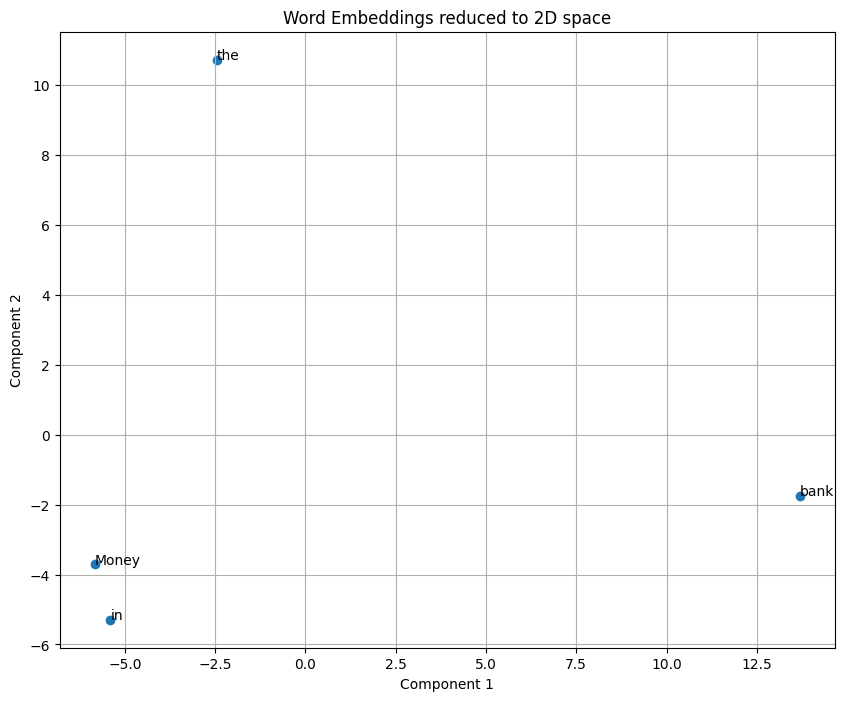

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a PCA object to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the embeddings using PCA
reduced_embeddings = pca.fit_transform(embeddings_2)

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate the points with the words
words = ["Money", "in", "the", "bank"]

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('Word Embeddings reduced to 2D space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()